In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import sqlalchemy and password for postgres
from sqlalchemy import create_engine
from password import password

# Use sqlalchemy engine to grab postgres database
engine = create_engine('postgresql://postgres:' + password + '@localhost:5432/sql_challenge_db')
connection = engine.connect()

In [4]:
# Import salary table as pandas dataframe
salary_df = pd.read_sql_table('salaries', con=engine)
salary_df.head(5)

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [9]:
# Inspect the salary data to set up histogram
print(salary_df['salary'].value_counts())
print(f"The minimum and maximum salaries are {salary_df['salary'].min()} and {salary_df['salary'].max()}")


40000    95346
55581       19
53738       18
53078       18
47454       17
         ...  
74239        1
78148        1
76103        1
79114        1
81762        1
Name: salary, Length: 50355, dtype: int64
The minimum and maximum salaries are 40000 and 129492


In [27]:
# Make histogram of employee salaries to visualize salary distribution

x = salary_df['salary']
bins = [40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000]
fig = plt.figure(figsize = (10,10))
plt.hist(x, bins=bins, histtype='bar', align='mid', orientation='vertical', color='blueviolet')
plt.title('Employee Salary Histogram', fontsize = 14)
plt.ylabel('Number of Employees', fontsize = 12)
plt.xlabel('Salary', fontsize = 12)
plt.xticks(range(40000, 130000, 10000))
fig.savefig('Images/salary_histogram')
plt.close()
fig.clear()

In [12]:
# Import employee-department and department tables into pandas
emp_dept_df = pd.read_sql_table('emp_dept', con=engine)
dept_df = pd.read_sql_table('departments', con=engine)

In [18]:
# Merge salary df with employee - department dataframe
# Perform second merge with department table
# Create groupby dataframe and perform mean aggregate function
# Drop employee number from the dataframe
df_sal_dept = pd.merge(salary_df, emp_dept_df, on='emp_no')
df_alldata = pd.merge(df_sal_dept, dept_df, on = 'dept_no')
df_dept_salary = df_alldata.groupby('dept_name').mean()
df_dept_salary.drop('emp_no', axis = 1, inplace = True)
df_dept_salary

,salary
dept_name,
Customer Service,47998.670441
Development,48697.334663
Finance,59533.516546
Human Resources,44678.646801
Marketing,61095.897383
Production,48760.450827
Quality Management,46456.005717
Research,48850.189719
Sales,69832.127151


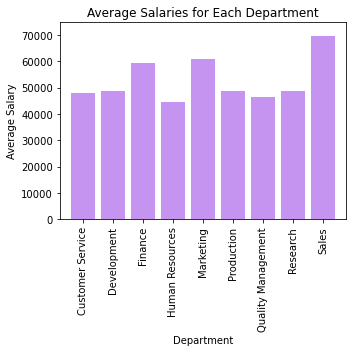

In [31]:
# Create bar chart of mean salaries by 
data = df_dept_salary['salary']
x_axis = np.arange(len(data))
fig = plt.figure(figsize = (5,5))
plt.bar(x_axis, data, color='blueviolet', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
tick_labels = [name for name in df_dept_salary.index]
plt.xticks(tick_locations, tick_labels, rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(data)+5000)
plt.title("Average Salaries for Each Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.tight_layout()
fig.savefig('Images/dept_salary_bar')

In [32]:
# import employees table to understand if we were given a wild goose chase
emp_df = pd.read_sql_table('employees', con=engine)

In [33]:
# examine employee number 499942 to see if there is something unique about the employee
# Lol, April Fools!!
emp_df.head()
filt = emp_df['emp_no'] == 499942
emp_df.loc[filt]

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
168736,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
